In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.linalg as la
import pyvista as pv
import imageio.v3 as iio
import os
np.set_printoptions(formatter={"float": "{:10.2f}".format})

In [3]:
from src.experiment import Experiment
from src.pycv.dmcp import dm_to_world
#mesh_path = "/home/julian/code/uni/ushichka-registration/data/formatted/lidar_roi.ply"
mesh_path = "C:/Users/Julian/Nextcloud/Uni/Semester 8/ushichka-registration/data/formatted/lidar_roi.ply"
pvMesh = pv.read(mesh_path)

In [4]:
date = "2018-08-17" # 08-14 bad, 08-17 good
#day = "/home/julian/data/dmcp_experiments/round_05" + os.sep + date
day = "/data/dmcp_experiments/round_05" + os.sep + date
def path_day_cam(day,cam):
    exp_path = f"{day}--cam{cam}"
    return exp_path

In [5]:
pc0 = path_day_cam(day,0)
pc1 = path_day_cam(day,1)
pc2 = path_day_cam(day,2)

exp0 = Experiment(pc0,mesh_path)
exp1 = Experiment(pc1,mesh_path)
exp2 = Experiment(pc2,mesh_path)
exps = [exp0, exp1, exp2]

In [7]:
from src.pyushichka import loadCalibration
date_path = r"C:\data\ushichka" + os.sep + date
#date_path = "/home/julian/data/ushichka" + os.sep + date
ps = [loadCalibration(0,date_path),loadCalibration(1,date_path),loadCalibration(2,date_path)]
pts = []
for cam in ps:
    K, P = cam
    #P_trans = P @ la.inv(trans)
    pos = (la.null_space(P) / la.null_space(P)[-1])[:3].flatten()
    pts.append(pos)

pts = np.array(pts)
pts_hat = np.hstack((pts,np.ones((pts.shape[0],1))))
pts_hat

array([[     -2.80,       1.97,      -0.31,       1.00],
       [     -0.93,       4.12,      -2.84,       1.00],
       [      0.64,       4.10,      -1.40,       1.00]])

In [8]:
from dataclasses import dataclass
@dataclass
class TransformedCameras:
    pts: np.ndarray = np.array([])
tcs = []
for exp in exps:
    trans = exp.load_transform()[:3,:]
    tc = TransformedCameras(pts=(trans @ pts_hat.T).T)
    tcs.append(tc)

tcs

[TransformedCameras(pts=array([[      1.39,       1.83,       0.52],
        [      1.58,      -1.32,      -1.60],
        [      0.10,      -2.07,      -0.27]])),
 TransformedCameras(pts=array([[      1.72,       1.87,       0.42],
        [      1.95,      -1.33,      -1.62],
        [      0.48,      -2.07,      -0.27]])),
 TransformedCameras(pts=array([[      1.53,       2.19,       0.49],
        [      1.93,      -1.03,      -1.52],
        [      0.49,      -1.82,      -0.17]]))]

In [9]:
plotter = pv.Plotter(notebook=False)
for i in range(len(tcs)):
    tc = tcs[i]
    sv = pv.PolyData(tc.pts)
    plotter.add_mesh(sv, color=["red","green","blue"][i], point_size=25,render_points_as_spheres=True)
plotter.add_mesh(pvMesh)
plotter.show()

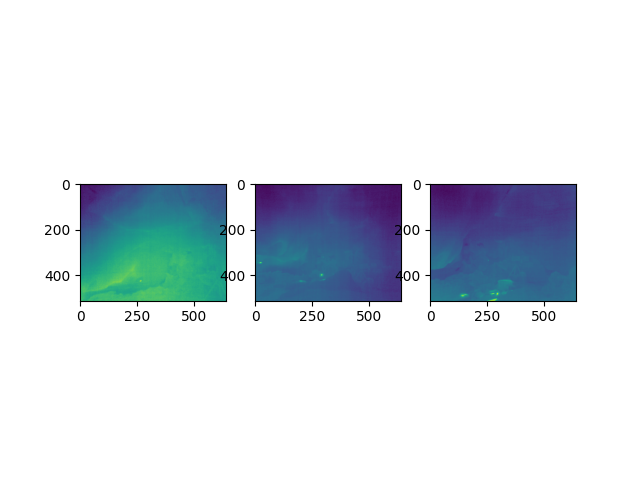

In [10]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(exp0.load_imIm())
plt.subplot(1,3,2)
plt.imshow(exp1.load_imIm())
plt.subplot(1,3,3)
plt.imshow(exp2.load_imIm())
plt.show()

NameError: name 'preicp' is not defined

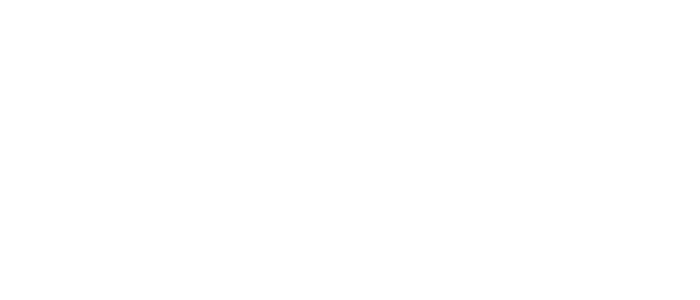